In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Book data for Validation
book_testparquet = pd.read_parquet('../../../data/book_test.parquet/stock_id=0')
book_testparquet.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [4]:
# Trading data for validation
trade_testparquet = pd.read_parquet('../../../data/trade_test.parquet/stock_id=0')
trade_testparquet.head()

,time_id,seconds_in_bucket,price,size,order_count
0,4,7,1.000344,1,1
1,4,24,1.000049,100,7
2,4,27,1.000059,100,3


In [6]:
# Target data for training
train = pd.read_csv('../../../data/train.csv')
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [7]:
# Book data for training
book_example = pd.read_parquet('../../../data/book_train.parquet/stock_id=0')
book_example.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


In [8]:
# Trade data for training
trade_example = pd.read_parquet('../../../data/trade_train.parquet/stock_id=0')
trade_example.head()

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1


In [9]:
# EDA: Explanatorty data analysis

# Check the number of stocks
# =====================================
# stock_id: symbols?
# time_id: the periodic samples
# target: the number of targets
for col in train.columns:
    print(col, ":", len(train[col].unique()))

stock_id : 112
time_id : 3830
target : 414287


mean value= 0.0038805243039130312
sum value= 14.860998424142867


,stock_id,mean,median,std,count,sum
0,0,0.004028,0.003180,0.002855,3830,15.429071
1,1,0.004362,0.003719,0.002433,3830,16.704962
2,2,0.002385,0.001748,0.002339,3830,9.133223
3,3,0.006182,0.005422,0.003201,3830,23.675414
4,4,0.004197,0.003397,0.002879,3830,16.073408
...,...,...,...,...,...,...
107,122,0.003762,0.003176,0.002300,3830,14.407997
108,123,0.002506,0.001967,0.001816,3830,9.599594
109,124,0.003691,0.003143,0.001953,3830,14.135579
110,125,0.002016,0.001575,0.001703,3830,7.719409


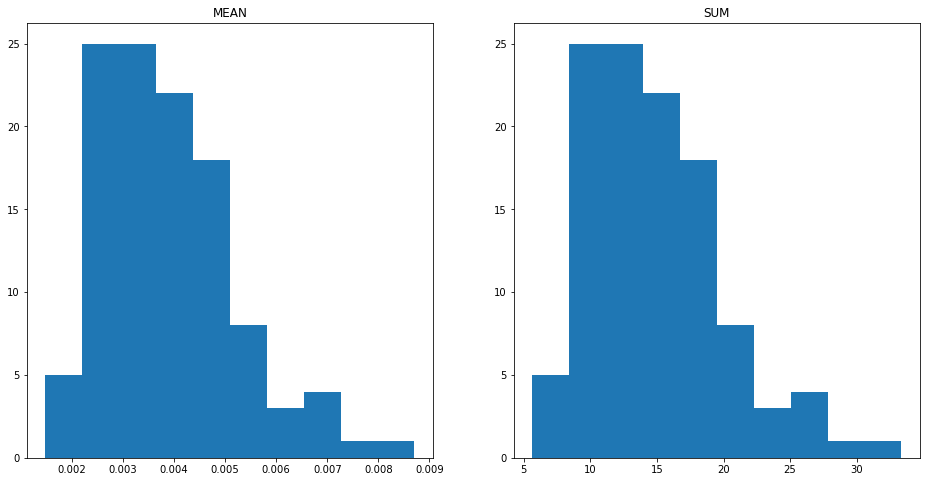

In [16]:
# Statisticts of each stock id
stock = train.groupby("stock_id")["target"].agg(["mean", "median", "std", "count", "sum"]).reset_index()
print('mean value=', stock['mean'].mean())
print('sum value=', stock['sum'].mean())
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes.flatten()
axes[0].hist(stock['mean'])
axes[0].set_title('MEAN')
axes[1].hist(stock['sum'])
axes[1].set_title('SUM')
stock

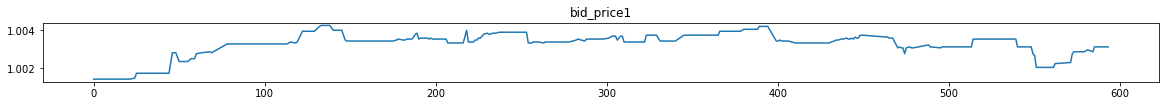

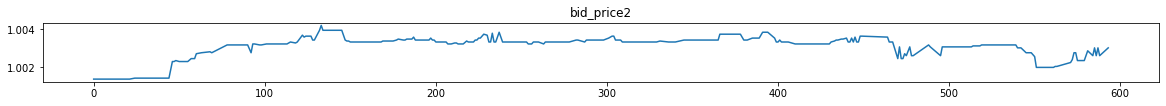

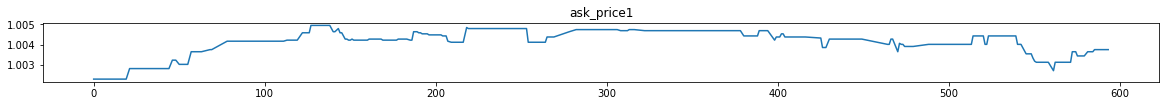

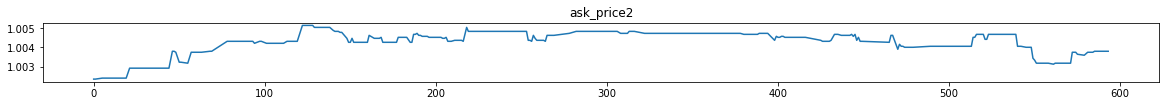

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


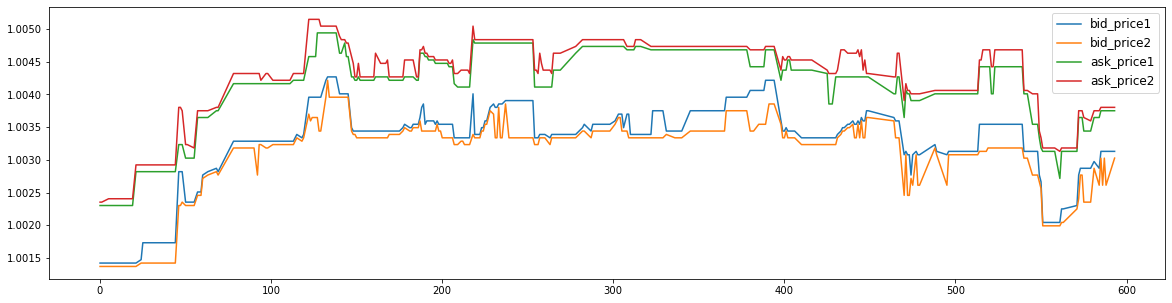

In [22]:
# the relationships of time_id and bid, ask
book_test = book_example[book_example['time_id']==5]
samples = ["bid_price1", "bid_price2", "ask_price1", "ask_price2"]

for num, a in enumerate(samples):
    plt.figure(figsize=(20, 5))
    plt.subplot(4, 1, num+1)
    plt.plot(book_test["seconds_in_bucket"], book_test[a])
    plt.title(a)
    
plt.show()
plt.figure(figsize=(20, 5))
for num, a in enumerate(samples):
    plt.plot(book_test["seconds_in_bucket"], book_test[a], label=a)

plt.legend(fontsize=12)
book_test.head()

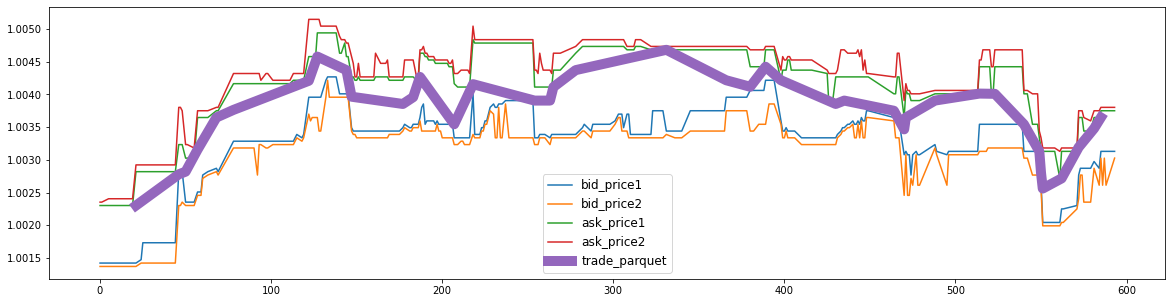

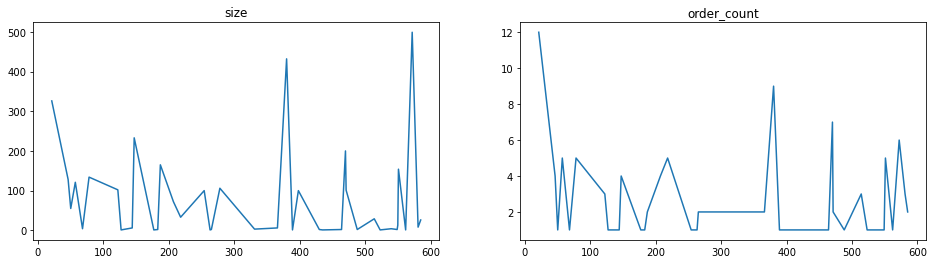

In [24]:
# add trading information
trade_test = trade_example[trade_example['time_id']==5]
plt.figure(figsize=(20,5))
for num, a in enumerate(samples):
    plt.plot(book_test["seconds_in_bucket"], book_test[a], label=a)
    
plt.plot(trade_test["seconds_in_bucket"], trade_test["price"], label="trade_parquet", lw=10)
plt.legend(fontsize=12)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs.flatten()
trade_samples = ['size', 'order_count']
for num, a in enumerate(trade_samples):
    axs[num].plot(trade_test["seconds_in_bucket"], trade_test[a])
    axs[num].set_title(a)

min index is 2901 min target is 0.000593833


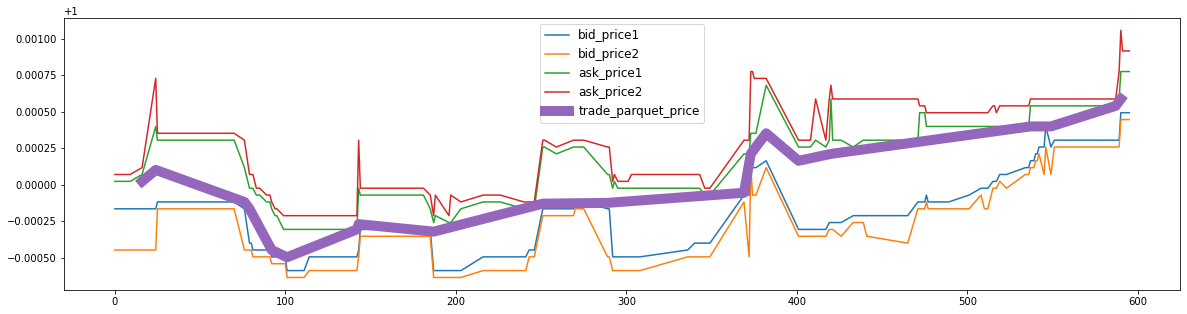

In [30]:
# the lowest volatility case in stock_id=0
stock0 = train[train['stock_id']==0]
min_index = stock0["target"].idxmin()
min_time_id = stock0.iloc[min_index]["time_id"]
print('min index is', min_index, 'min target is', stock0.iloc[min_index]['target'])

book_test_min = book_example[book_example['time_id']==min_time_id]
trade_test_min = trade_example[trade_example['time_id']==min_time_id]

plt.figure(figsize=(20,5))
for num, a in enumerate(samples):
    plt.plot(book_test_min['seconds_in_bucket'], book_test_min[a], label=a)
    
plt.plot(trade_test_min['seconds_in_bucket'], trade_test_min['price'], label='trade_parquet_price', lw=10)
plt.legend(fontsize=12)

max index is 2394 max target is 0.036311154


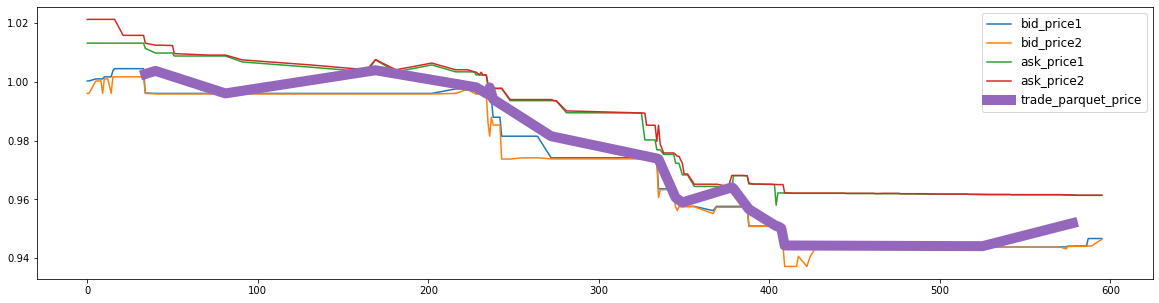

In [33]:
# The highest volatility case in stock_id=0
max_index = stock0['target'].idxmax()
max_time_id = stock0.iloc[max_index]['time_id']
print('max index is',max_index, 'max target is', stock0.iloc[max_index]['target'])

book_test_max = book_example[book_example['time_id']==max_time_id]
trade_test_max = trade_example[trade_example['time_id']==max_time_id]

plt.figure(figsize=(20,5))
for num, a in enumerate(samples):
    plt.plot(book_test_max['seconds_in_bucket'], book_test_max[a], label=a)
    
plt.plot(trade_test_max['seconds_in_bucket'], trade_test_max['price'], label='trade_parquet_price', lw=10)
plt.legend(fontsize=12)

In [ ]:
# Create submission data by median
median = stock[['stock_id', 'median']]
median = median.set_index("stock_id")

median_dict = median.to_dict()
sample = pd.read_csv('../../../data/sample_submission.csv')

sample['stock_id'] = [s.split("-")[0] for s in sample['row_id']]
sample['target'] 